In [13]:
import warnings; warnings.simplefilter('ignore')

In [14]:
import iris
import os
import glob
import matplotlib
matplotlib.use('Agg')
import matplotlib as mpl
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import iris.coords
import numpy as np
import numpy.ma as ma
import pickle
from matplotlib.colors import BoundaryNorm
iris.FUTURE.netcdf_no_unlimited=True
iris.FUTURE.netcdf_promote=True
from iris.experimental.equalise_cubes import equalise_attributes
%matplotlib inline

In [24]:
%%time

wildcard_ctrl = '/nesi/nobackup/niwa00013/varmavr/cylc-run/u-ba731/share/data/History_Data/*pk*'
file_ctrl = glob.glob(wildcard_ctrl)
stash_list =['m01s02i201','m01s01i201']
ctn = [iris.AttributeConstraint(STASH=stash) for stash in stash_list]

CPU times: user 3.27 ms, sys: 7.57 ms, total: 10.8 ms
Wall time: 17.4 ms


In [25]:
%%time

LW_SW_surf_ctrl = iris.load(file_ctrl,ctn)
equalise_attributes(LW_SW_surf_ctrl)
LW_SW_surf_ctrl=LW_SW_surf_ctrl.concatenate()
pickle.dump(LW_SW_surf_ctrl, open( "/home/williamsjh/scripts/LW_SW_surf_ctrl.p", "wb" ) )

CPU times: user 42min 35s, sys: 36 s, total: 43min 11s
Wall time: 44min


In [26]:
%%time

fileObject_ctrl_a = open('/home/williamsjh/scripts/LW_SW_surf_ctrl.p','r')
fileObject_ctrl = pickle.load(fileObject_ctrl_a)

LW_plus_SW_surf = fileObject_ctrl[0] + fileObject_ctrl[1]

CPU times: user 7.43 s, sys: 102 ms, total: 7.53 s
Wall time: 7.68 s


In [27]:
%%time

# Averaging

LW_plus_SW_surf_tim = LW_plus_SW_surf.collapsed('time',iris.analysis.MEAN)
LW_plus_SW_surf_zon = LW_plus_SW_surf_tim.collapsed('longitude',iris.analysis.MEAN)

CPU times: user 1min 59s, sys: 35.9 s, total: 2min 35s
Wall time: 3min 9s


CPU times: user 16.8 ms, sys: 1.05 ms, total: 17.8 ms
Wall time: 16.3 ms


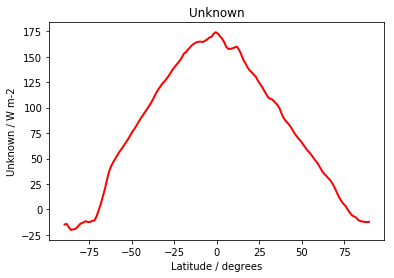

In [28]:
%%time

qplt.plot(LW_plus_SW_surf_zon,label='GA8_CTRL',color='red', lw=2.0)